# Lab | Handling Data Imbalance

#### Begin the Modeling here

Look critically at the dtypes of numerical and categorical columns and make changes where appropriate.
Concatenate numerical and categorical back together again for your X dataframe. Designate the TargetB as y.
Split the data into a training set and a test set.
Split further into train_num and train_cat. Also test_num and test_cat.
Scale the features either by using MinMax Scaler or a Standard Scaler. (train_num, test_num)
Encode the categorical features using One-Hot Encoding or Ordinal Encoding. (train_cat, test_cat)
fit only on train data, transform both train and test
again re-concatenate train_num and train_cat as X_train as well as test_num and test_cat as X_test
Fit a logistic regression model on the training data.
Check the accuracy on the test data.
Note: So far we have not balanced the data.

- Managing imbalance in the dataset

Check for the imbalance.
Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
Each time fit the model and see how the accuracy of the model has changed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [89]:
numerical = pd.read_csv('/Users/heloisabal/IH-Labs/lab-revisiting-machine-learning/numerical.csv')
categorical = pd.read_csv('/Users/heloisabal/IH-Labs/lab-revisiting-machine-learning/categorical.csv')

In [90]:
print(numerical.shape)
print(categorical.shape)

(95280, 318)
(95412, 13)


In [91]:
donors = pd.concat([numerical, categorical], axis=1)
donors = donors.dropna()

In [92]:
donors.dtypes

TCODE       float64
DOB         float64
AGE         float64
INCOME      float64
WEALTH1     float64
             ...   
RFA_2R       object
RFA_2A       object
GEOCODE2     object
DOMAIN_A     object
DOMAIN_B      int64
Length: 331, dtype: object

In [93]:
X = donors.drop(columns=['TARGET_B','TARGET_D'])
y = donors['TARGET_B']

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [96]:
categorical.dtypes

STATE       object
CLUSTER      int64
AGEFLAG     object
HOMEOWNR    object
GENDER      object
DATASRCE     int64
SOLIH        int64
VETERANS    object
RFA_2R      object
RFA_2A      object
GEOCODE2    object
DOMAIN_A    object
DOMAIN_B     int64
dtype: object

In [97]:
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

In [98]:
X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)

In [99]:
from sklearn.preprocessing import MinMaxScaler

MinMaxtransformer = MinMaxScaler().fit(X_train_num)
X_train_normalized = MinMaxtransformer.transform(X_train_num)
# we transform the test also but don't fit the transformer again
X_test_normalized = MinMaxtransformer.transform(X_test_num)

In [100]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_train_cat)
X_train_encode = encoder.transform(X_train_cat).toarray()
# we encode the test also but don't fit the encoder again
X_test_encode = encoder.transform(X_test_cat).toarray()

In [101]:
X_train = np.concatenate((X_train_normalized,X_train_encode),axis=1)
X_test = np.concatenate((X_test_normalized,X_test_encode),axis=1)

In [102]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)

print("test data accuracy was ",model.score(X_test,y_test))
print("train data accuracy was ",model.score(X_train,y_train))

test data accuracy was  0.9473131821998321
train data accuracy was  0.9515113350125944


In [103]:
from sklearn.feature_selection import VarianceThreshold 
var_threshold = 0.02
sel = VarianceThreshold(threshold=(var_threshold))

sel = sel.fit(X_train_normalized)
temp = sel.transform(X_train_normalized)
temp = pd.DataFrame(temp)
print(X_train_normalized.shape)
print(temp.shape)

(76224, 320)
(76224, 83)


In [104]:
%%time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


kbest = SelectKBest(chi2, k=10)
selector = kbest.fit(X_train_normalized, y_train)

X_train_selected = selector.transform(X_train_normalized)
X_test_selected = selector.transform(X_test_normalized)

CPU times: user 200 ms, sys: 176 ms, total: 376 ms
Wall time: 111 ms


In [105]:
selected = pd.DataFrame(X_train_selected)
selected.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.010101,0.010101,0.090909,0.060606,0.191919,0.008475,0.073171,0.333333
1,0.030303,0.040404,0.242424,0.616162,0.858586,0.171717,0.434343,0.021186,0.073171,0.333333
2,0.000000,0.000000,0.000000,0.010101,0.070707,0.000000,0.000000,0.021186,0.073171,0.666667
3,0.010101,0.878788,0.979798,1.000000,1.000000,0.979798,0.989899,0.033898,0.121951,1.000000
4,0.000000,0.010101,0.020202,0.080808,0.242424,0.030303,0.181818,0.000000,0.024390,0.000000


In [106]:
X_train = np.concatenate((X_train_selected,X_train_encode),axis=1)
X_test = np.concatenate((X_test_selected,X_test_encode),axis=1)

In [107]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)

print("test data accuracy was ",model.score(X_test,y_test))
print("train data accuracy was ",model.score(X_train,y_train))

test data accuracy was  0.945528967254408
train data accuracy was  0.951786838790932


In [108]:
max_depth = range(1,20)
test = []
train = []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    model.fit(X_train, y_train)
    test.append(model.score(X_test,y_test))
    train.append(model.score(X_train,y_train))

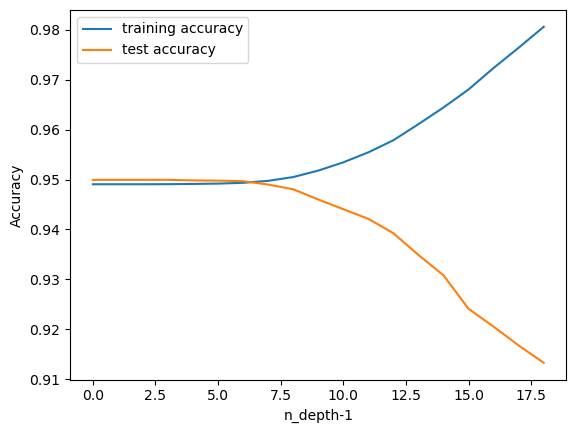

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth-1")
plt.legend()

In [110]:
from sklearn.metrics import classification_report

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("test data accuracy was ",model.score(X_test,y_test))
print("train data accuracy was ",model.score(X_train,y_train))
print("Classification Report:\n", classification_report(y_test, y_pred))

test data accuracy was  0.9499370277078085
train data accuracy was  0.9490580394626364
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     18102
         1.0       0.00      0.00      0.00       954

    accuracy                           0.95     19056
   macro avg       0.47      0.50      0.49     19056
weighted avg       0.90      0.95      0.93     19056



/Users/heloisabal/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/heloisabal/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/heloisabal/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SMOTE

In [112]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [113]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

print("test data accuracy was ",model.score(X_test,y_test))
print("train data accuracy was ",model.score(X_resampled,y_resampled))
print("Classification Report:\n", classification_report(y_test, y_pred))

test data accuracy was  0.7087531486146096
train data accuracy was  0.7208844223884104
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.72      0.83     18102
         1.0       0.08      0.43      0.13       954

    accuracy                           0.71     19056
   macro avg       0.52      0.58      0.48     19056
weighted avg       0.92      0.71      0.79     19056



In [114]:
max_depth = range(1,20)
test = []
train = []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    model.fit(X_resampled, y_resampled)
    test.append(model.score(X_test,y_test))
    train.append(model.score(X_resampled, y_resampled))

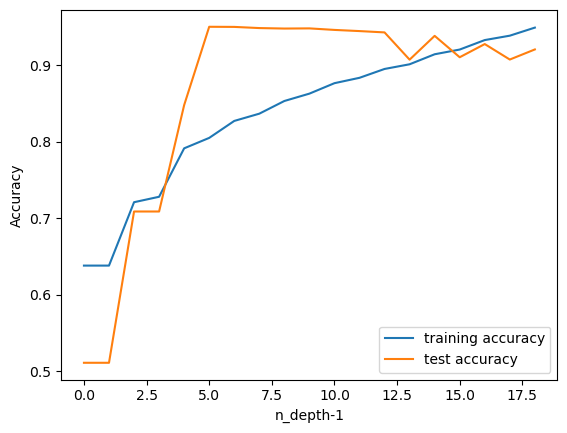

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth-1")
plt.legend()

In [116]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

print("test data accuracy was ",model.score(X_test,y_test))
print("train data accuracy was ",model.score(X_resampled,y_resampled))
print("Classification Report:\n", classification_report(y_test, y_pred))

test data accuracy was  0.9478379513014273
train data accuracy was  0.8626505024813038
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     18102
         1.0       0.00      0.00      0.00       954

    accuracy                           0.95     19056
   macro avg       0.47      0.50      0.49     19056
weighted avg       0.90      0.95      0.92     19056

